In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cProfile, pstats, io

# add parent directory to load spmimage
import sys
sys.path.append('..')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from spmimage.linear_model import FusedLassoADMM as FusedLasso

In [3]:
def show_plot(coef, value, coef_expected = None, value_expected = None, suptitle=None):
    # Plot signal and result
    
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.plot(coef, label='original')
    if coef_expected is not None:
        plt.plot(coef_expected, label='expected')    
    plt.title('coeficients')
    plt.legend(loc=1)
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(value, label='original')
    if value_expected is not None:
        plt.plot(value_expected, label='expected')        
    
    plt.title('value')
    plt.legend(loc=1)
    plt.grid()
    
    if suptitle is not None:
        plt.suptitle(suptitle)    

    plt.tight_layout()    
    if suptitle is not None:
        plt.subplots_adjust(top=0.85)

In [4]:
# fix the seed of random
np.random.seed(0)

## Fused Lasso

Fused Lasso minimises the following objective function.

$$
\frac{1}{2n}\| y - Xw \|_2^2 + \alpha_1\sum_{j=1}^p\left|w\right| + \alpha_2 \sum_{j=2}^p\left|w_j - w_{j-1}\right|
$$

where $\lambda_1$ tunes sparcity in $\beta$ and $\lambda_2$ does fusibility. In Generalized Lasso form, $D$ will be

$$
D = \frac{1}{\alpha} \left( \alpha_1I_p + \alpha_2 \left(\begin{array}{cccccc}
 1 & 0 & \ldots & 0 & 0 \\
-1 & 1 & \ldots & 0 & 0 \\
\vdots & \  & \ddots & \  & \vdots \\
0 & 0 & -1 & 1 & 0 \\
0 & 0 & \ldots & -1 & 1
\end{array}
\right)
\right) 
$$

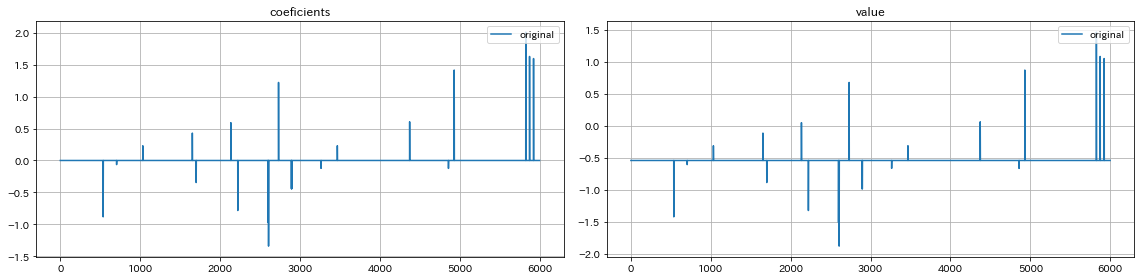

In [5]:
# input signals
n_samples = 6000
n_features = 12000

idx = np.random.randint(0, n_samples, 20)
beta = np.zeros(n_samples)
beta[idx] = np.random.normal(0.0, 1.0, 20)

X = np.eye(n_samples)
y = X.dot(beta) + np.random.normal(0, 1)
show_plot(beta, y)

# Traditional Fused Lasso

error : 42.0611
number of nonzero coefficients : 6000
number of unique coefficients : 1578
CPU times: user 1min 52s, sys: 4.56 s, total: 1min 56s
Wall time: 44.1 s


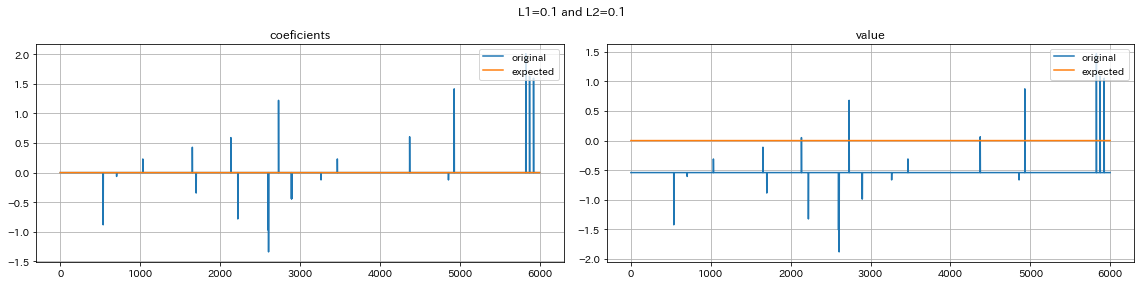

In [6]:
%%time

l1 = 0.1
l2 = 0.1

clf = FusedLasso(alpha=0.1, sparse_coef=l1, fused_coef=l2, tol=1e-8, tridiagonal=False)
clf.fit(X, y)
    
glasso_signal = clf.coef_
glasso_predict = X.dot(glasso_signal)    
    
# Plot signal and result
show_plot(beta, y, glasso_signal, glasso_predict, 'L1={0} and L2={1}'.format(l1, l2))

error = np.linalg.norm(y - glasso_predict)
coef = glasso_signal

nonzero_idx = np.where(coef != 0)[0]
print('error : {0:.4f}'.format(error))
print('number of nonzero coefficients : {0}'.format(len(nonzero_idx)))
print('number of unique coefficients : {0}'.format(len(np.unique(coef))))

# Tridiagonal Fused Lasso

error : 42.0611
number of nonzero coefficients : 6000
number of unique coefficients : 1495
CPU times: user 36.9 s, sys: 1.37 s, total: 38.3 s
Wall time: 13.9 s


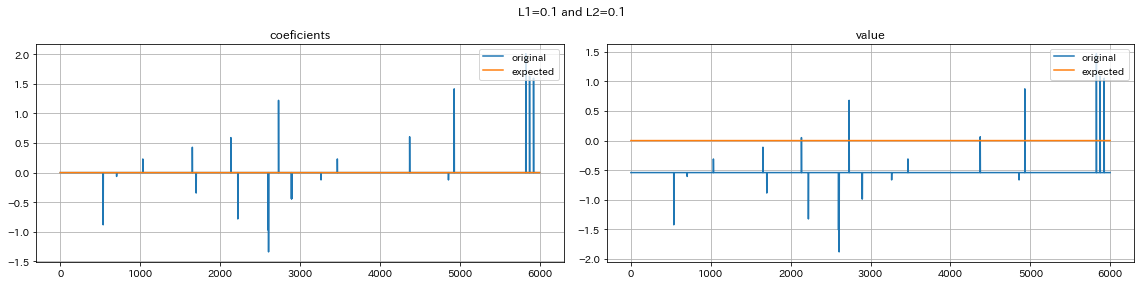

In [7]:
%%time

l1 = 0.1
l2 = 0.1

clf = FusedLasso(alpha=0.1, sparse_coef=l1, fused_coef=l2, tol=1e-8, tridiagonal=True)
clf.fit(X, y)
    
glasso_signal = clf.coef_
glasso_predict = X.dot(glasso_signal)    
    
# Plot signal and result
show_plot(beta, y, glasso_signal, glasso_predict, 'L1={0} and L2={1}'.format(l1, l2))

error = np.linalg.norm(y - glasso_predict)
coef = glasso_signal

nonzero_idx = np.where(coef != 0)[0]
print('error : {0:.4f}'.format(error))
print('number of nonzero coefficients : {0}'.format(len(nonzero_idx)))
print('number of unique coefficients : {0}'.format(len(np.unique(coef))))